# Kickstarter Project

Background

Financing a business has been one of the the biggest challenges for new entrepreneurs. One of the options that they have turned to is crowdfunding. Crowdfunding is a method of raising many small amounts of money from a large number of people. Kickstarter is one of these corporations that maintain a global crowdfunding platform having received more than $3.3 billion dollars pledged to its projects. Its mission is to “help bring creative projects to life”. And it uses an "All-or-Nothing" approach, meaning projects only get funded when campaigns reach their goals.

Of course, not all projects will be successfully funded in the platform. According to Kickstarter itself, success rate within the platform ever since it started is around 35%. The goal of this project is to find ways to increase the probability of getting funded.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
#load data
data = pd.read_csv('data/most_backed.csv', encoding='utf-8')
#delete unnecessary column
del data['Unnamed: 0']
data.head()

,amt.pledged,blurb,by,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url
0,8782571.0,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,6465690.0,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,5408916.0,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
3,5702153.0,\nUPDATED: This is it. We're making a Veronica...,Rob Thomas,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...
4,3336371.0,"\nAn adventure game from Tim Schafer, Double F...",Double Fine and 2 Player Productions,Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure


# Data Wrangling

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
amt.pledged         4000 non-null float64
blurb               4000 non-null object
by                  4000 non-null object
category            4000 non-null object
currency            4000 non-null object
goal                4000 non-null float64
location            4000 non-null object
num.backers         4000 non-null int64
num.backers.tier    4000 non-null object
pledge.tier         4000 non-null object
title               4000 non-null object
url                 4000 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 375.1+ KB


In [4]:
#to confirm amount of data that we have
len(data)

4000

In [5]:
#for easier access
data.columns = data.columns.str.replace('.','_')
#rename column
data = data.rename(columns={'by': 'creator'})

In [6]:
#remove \n from string
data['blurb'] = data.blurb.str.replace("\n", "")
data.head()

,amt_pledged,blurb,creator,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
0,8782571.0,This is a card game for people who are into ki...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,6465690.0,"An unusually addicting, high-quality desk toy ...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,5408916.0,Bring Reading Rainbow’s library of interactive...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
3,5702153.0,UPDATED: This is it. We're making a Veronica M...,Rob Thomas,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...
4,3336371.0,"An adventure game from Tim Schafer, Double Fin...",Double Fine and 2 Player Productions,Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure


In [7]:
#What currencies are used in the data? This is to see how we can standardize the data
data.groupby('currency')['title'].count().sort_values(ascending=False).reset_index(name='counts')

,currency,counts
0,usd,3438
1,gbp,252
2,cad,128
3,eur,96
4,aud,52
5,sek,14
6,nzd,10
7,dkk,7
8,chf,3


In [8]:
#percentage of campaigns in USD, and actual number of projects in USD
float(3438)/len(data)*len(data), float(3438)/len(data)*len(data)/len(data)*100

(3438.0, 85.95)

This gives us an idea on how we can further clean the data. Exchange rates' volatility may introduce inconsistencies within the data. Thus we can exclude other currencies, since it will leave us with more than 85% of our original data or just a little more than 3,400.

In [9]:
#get only data that is in usd
data = data[data.currency=='usd']
#confirm number of remaining data
len(data)

3438

# Exploratory Data Analysis

In [10]:
data.describe()

,amt_pledged,goal,num_backers
count,3.438000e+03,3.438000e+03,3438.000000
mean,2.993426e+05,6.293132e+04,3651.630890
std,7.472287e+05,1.316774e+05,7601.741542
min,4.773000e+03,1.000000e+00,1109.000000
25%,7.006650e+04,1.312500e+04,1413.000000
50%,1.243020e+05,3.000000e+04,1963.000000
75%,2.656628e+05,6.000000e+04,3397.000000
max,2.033899e+07,2.000000e+06,219382.000000


One assumption we can make is that the more backers you have the higher the amount pledged will be. Though this seems logical it is better to verify this ourself.

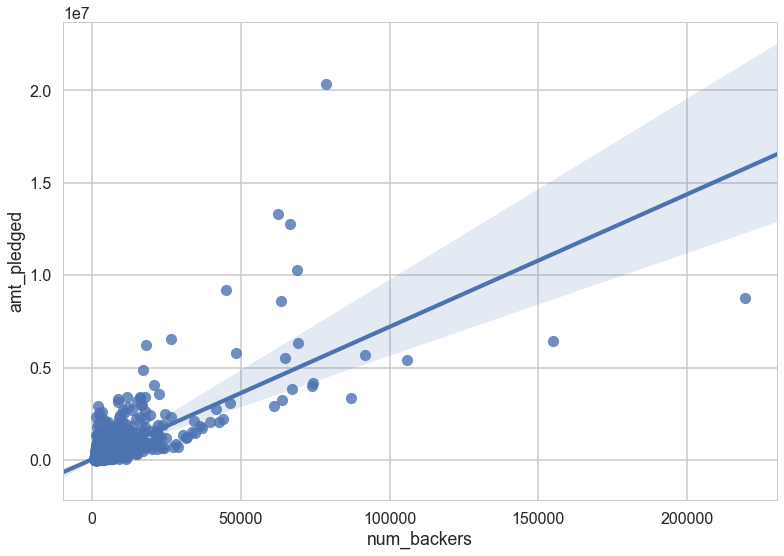

In [11]:
#regression line to determine if we can use our assumption
reg = sns.regplot(x=data['num_backers'], y=data['amt_pledged'])

In [12]:
#amount pledged per backer
round(sum(data['amt_pledged'])/ sum(data['num_backers']), 2)

81.98

On average, a backer for a successful campaign will pledge close to $82.

In [13]:
#how many categories do we have in the data
len(data.groupby('category'))

114

In [14]:
#which categories are backed the most? which categories are part of the top 10?
category = data.groupby('category')['title'].count().sort_values(ascending=False).reset_index(name='counts')
category.head(10)

,category,counts
0,Product Design,675
1,Tabletop Games,671
2,Video Games,410
3,Hardware,145
4,Technology,129
5,Documentary,110
6,Gadgets,100
7,Design,79
8,Comics,75
9,Fashion,56


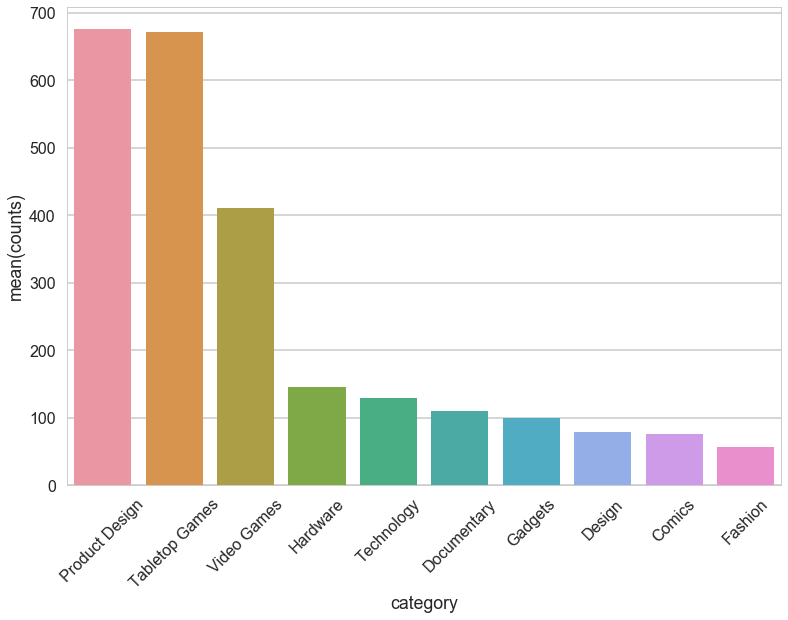

In [15]:
#bar plot of categories
bar = sns.barplot(category['category'].head(10), category['counts'].head(10))
for item in bar.get_xticklabels():
    item.set_rotation(45)

In [16]:
#sum of the top 10 cateogies in the 
sum(data.groupby('category')['title'].count().sort_values(ascending=False).head(10))

2450

In [17]:
#sum of top 10 categories expressed as a percentage of the entire data
round(sum(data.groupby('category')['title'].count().sort_values(ascending=False).head(10))/float(len(data))*100, 2)

71.26

This is interesting considering that close to 3 out of 4 of the most backed campaigns belong to these 10 categories.

In [18]:
#which categories are backed the most in terms of actual backers
category_back = data.groupby('category')['num_backers'].sum().sort_values(ascending=False).reset_index(name='sum')
category_back.head(10)

,category,sum
0,Video Games,2498514
1,Product Design,2461605
2,Tabletop Games,2264302
3,Hardware,531269
4,Technology,439679
5,Gadgets,303584
6,Documentary,258132
7,Design,229267
8,Narrative Film,213362
9,Comics,200335


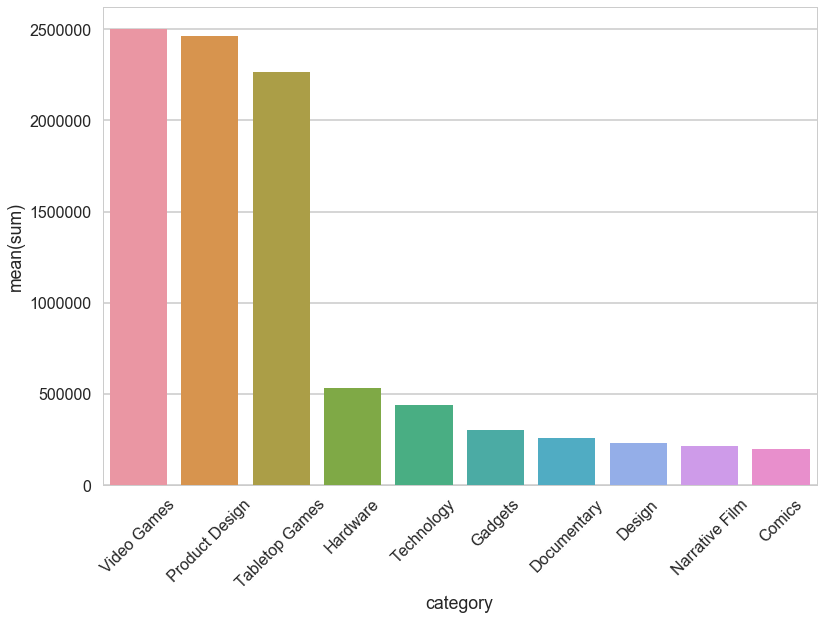

In [19]:
#bar plot of categories back by number of backers
bar = sns.barplot(category_back['category'].head(10), category_back['sum'].head(10))
for item in bar.get_xticklabels():
    item.set_rotation(45)

Though there are a few changes in the ranking, it is nearly identical to the earlier graph when we just looked at the categories and the number of projects backed. This information gives us an idea of the preferences of the backers in general in the kickstarter platform.

In [20]:
#which goal is backed the most?
goal = data.groupby('goal')['title'].count().sort_values(ascending=False).reset_index(name='counts')
len(goal)

310

There are 310 different goals. For simplicity, we will round up the goals to the nearest 5000.

In [21]:
#weighted average of the goals in the data
round(np.average(goal.goal, weights=goal.counts),2)

62931.32

In [22]:
#goal top 10 prior to rounding up
goal.head(10)

,goal,counts
0,50000.0,293
1,20000.0,263
2,10000.0,242
3,100000.0,216
4,15000.0,205
5,30000.0,187
6,25000.0,178
7,5000.0,146
8,40000.0,120
9,75000.0,98


In [23]:
#round up the data to the nearest 5000
goal.goal=-(-goal.goal//5000)*5000
#groupby again with the round up data
goal = goal.groupby('goal')['counts'].sum().sort_values(ascending=False).reset_index(name='counts')
goal.head(10)

,goal,counts
0,10000.0,435
1,20000.0,345
2,5000.0,331
3,15000.0,326
4,50000.0,315
5,30000.0,232
6,100000.0,225
7,25000.0,222
8,40000.0,143
9,75000.0,98


[[]]

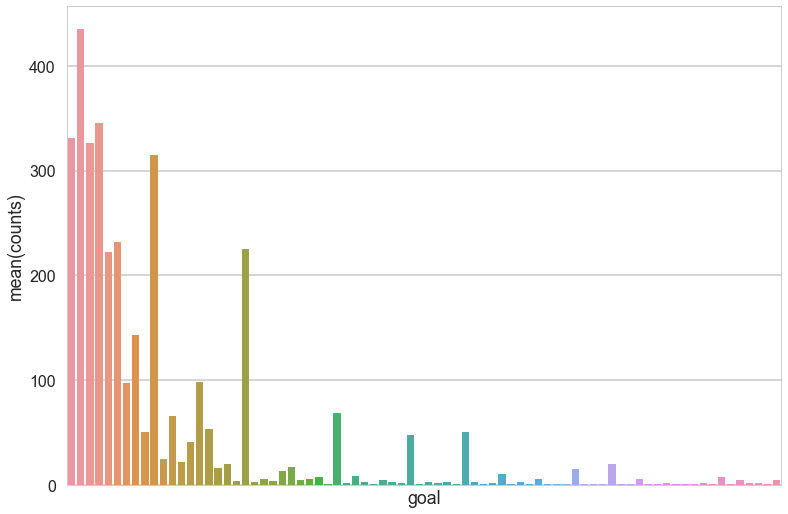

In [24]:
#bar plot of goals
bar = sns.barplot(goal['goal'], goal['counts'])
bar.set(xticks=[])

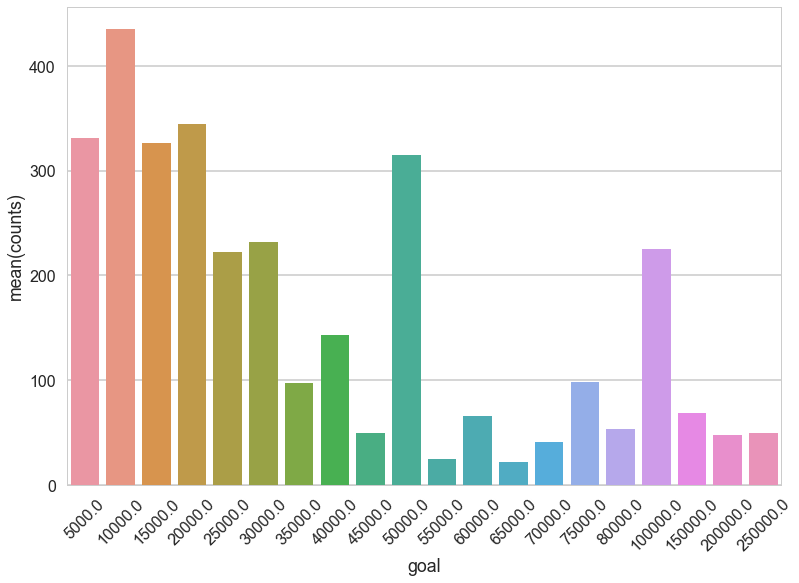

In [25]:
#bar plot for top 20 goals
bar = sns.barplot(goal['goal'].head(20), goal['counts'].head(20))
for item in bar.get_xticklabels():
    item.set_rotation(45)

In [26]:
#number of goals, sum of top 5 goals, and top 5 goals as a percentage of the entire data
len(goal), sum(goal.counts.head(5)), round(sum(goal.counts.head(5))/float(len(data))*100, 2)

(78, 1752, 50.96)

In [27]:
#weighted average of top 5 goals
round(np.average(goal.goal.head(5), weights=goal.counts.head(5)),2)

19146.69

It must be noted that the weighted average of 19,000 is pulled up by the 50,000 goal.

In [28]:
#what's the smallest goal and the biggest goal?
min(data.goal), max(data.goal)

(1.0, 2000000.0)

In [29]:
sum(data.goal==1.0)

4

In [30]:
#percent over goal
round(sum(data['amt_pledged'])/sum(data['goal']), 2)

4.76

This just confirms the idea that the lower one's goal is the higher the chances of success. For anyone looking to raise funds through kickstarter that has an "All or Nothing" policy, this result suggests that lower goals will lead to higher chances of success.

While it is tempting to set the lowest goal possible to succeed, one needs to remember that each project comes at a cost. In order to do well in a project or business the returns need to be higher than the cost. When setting a kickstarter goal, it is best to set a goal that covers the cost and the minimum amount one is willing to do a project.

In [31]:
#from which locations do campaigns get backed the most?
loc = data.groupby('location')['title'].count().sort_values(ascending=False).reset_index(name='counts')
loc.head(10)

,location,counts
0,"San Francisco, CA",278
1,"Los Angeles, CA",271
2,"New York, NY",209
3,"Seattle, WA",147
4,"Chicago, IL",121
5,"Brooklyn, NY",103
6,"Portland, OR",84
7,"San Diego, CA",62
8,"Austin, TX",60
9,"Boston, MA",56


In [32]:
#from how many locations did the campaigns come from
len(loc)

679

When looking at the location data, it must be noted that majority of the locations will most definitely be in America because of the currency selected for analysis.

In [33]:
#who has the most backed projects?
creator = data.groupby('creator')['title'].count().sort_values(ascending=False).reset_index(name='counts')
creator.head(10)

,creator,counts
0,CoolMiniOrNot,24
1,Michael Mindes,20
2,Richard Thomas,17
3,Travis,14
4,Mantic Games,12
5,Game Salute,12
6,Seth Hiatt,11
7,sekaiproject,10
8,Queen Games,10
9,David B. Talton Jr.,8


In [34]:
#what categories are
data[data['creator'] == 'CoolMiniOrNot'].head(2)

,amt_pledged,blurb,creator,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
49,3560642.0,A dungeon crawl board game with no game master...,CoolMiniOrNot,Tabletop Games,usd,200000.0,"Atlanta, GA",22361,"[1820, 18505]","[110.0, 120.0]",Massive Darkness,/projects/coolminiornot/massive-darkness
58,4079204.0,"The ultimate zombie boardgame, reinvented in a...",CoolMiniOrNot,Tabletop Games,usd,125000.0,"Atlanta, GA",20915,"[1026, 900, 18085]","[100.0, 140.0, 150.0]",Zombicide: Black Plague,/projects/coolminiornot/zombicide-black-plague


In [35]:
data[data['creator']=='Michael Mindes'].head(2)

,amt_pledged,blurb,creator,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
164,250070.0,A vicious dragon is out there... Assemble your...,Michael Mindes,Tabletop Games,usd,15000.0,"Tucson, AZ",10877,"[8133, 741, 1272, 100, 276, 260, 14, 17, 9, 5]","[15.0, 23.0, 29.0, 50.0, 75.0, 100.0, 110.0, 1...",Dungeon Roll - A Dicey Dungeon Delve,/projects/michaelmindes/dungeon-roll-a-dicey-d...
226,65195.0,The super portable war/area control game with ...,Michael Mindes,Tabletop Games,usd,5000.0,"Mountain Green, UT",9055,"[5237, 2145, 790, 873]","[3.0, 6.0, 9.0, 12.0]",Coin Age - A PAY-WHAT-YOU-WANT area control m...,/projects/michaelmindes/coin-age-a-pay-what-yo...


In [36]:
data[data['creator']=='Richard Thomas'].head(2)

,amt_pledged,blurb,creator,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
690,684755.0,Contribute to help us give the Deluxe Exalted ...,Richard Thomas,Tabletop Games,usd,60000.0,"Macungie, PA",4368,"[265, 17, 18, 765, 24, 4, 95, 69, 29, 19, 50, ...","[1.0, 10.0, 25.0, 30.0, 35.0, 40.0, 45.0, 55.0...",Deluxe Exalted 3rd Edition,/projects/200664283/deluxe-exalted-3rd-edition
753,334714.0,Contribute to help us create and traditionally...,Richard Thomas,Tabletop Games,usd,25000.0,"Macungie, PA",4085,"[25, 36, 1279, 81, 99, 35, 1099, 1234, 103, 11...","[5.0, 10.0, 20.0, 25.0, 40.0, 55.0, 85.0, 100....",Scion 2nd Edition Tabletop RPG,/projects/200664283/scion-2nd-edition-tabletop...


Looking at the top 3 most backed creators, we can see that they are all engaged in tabletop games. This isn't surprising and may also give us an idea in terms of what to focus on.

In [37]:
#how did the number 1 creator  in terms of having the most backers for a single campaign do?
data[data['creator']=='Elan Lee']

,amt_pledged,blurb,creator,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
0,8782571.0,This is a card game for people who are into ki...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens


In [38]:
#how many creators only had 1 project in the most backed ones? And in terms of percentage how many are they?
creator[creator['counts']==1].sum()[1], round(creator[creator['counts']==1].sum()[1]/float(len(data))*100, 2)

(2242, 65.21)

Of the creators that are most backed, majority of them only made 1 extremely successful campaign. This data may be misleading though as we do not have sufficient evidence to say that those are one hit wonders or it was just the first of there many campaigns.

We also looked at if pledge tiers matter but in the interest of time and since a similar analysis exist, we will just reference it here. Basically, the author in that analysis found out that the median price for projects are important and that majority of a project's contributions will come from the lower price range.

The analysis and code is available here: https://www.kaggle.com/nowaxsky/do-tiers-matter

In [39]:
from wordcloud import WordCloud, STOPWORDS

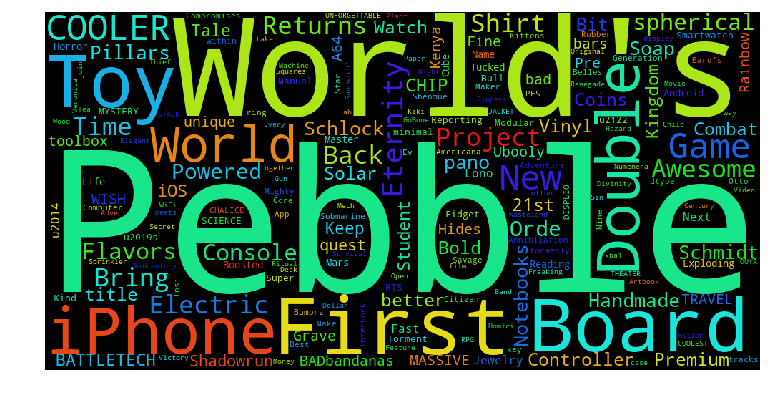

In [40]:
#wordcloud for title
plt.imshow(WordCloud(width=1000, height=500, random_state=1).generate(str(data['title'])))
plt.axis("off")
plt.show()

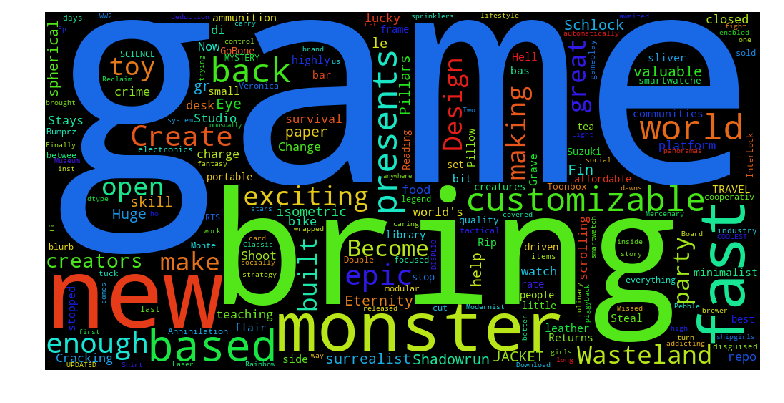

In [41]:
#wordcloud for blurb
plt.imshow(WordCloud(width=1000, height=500, random_state=0).generate(str(data['blurb'])))
plt.axis("off")
plt.show()

# Initial Findings

From the analysis that we have performed, there are a few interesting observations:
- There is a high correlation of number of backers to amount pledged.
- The categories that have the most backers are video games, product design and tabletop games.
- The lower goals have a greater chance at campaign success.
- Median price is important and majority of campaign pledges will come from the lower tiers.

# Training a Machine Learning Model to Predict Success

We will use the live dataset, for this section. This dataset has a few columns similar to the most backed ones. Of most interest is the blurb column as we can try to predict success using sentiment analysis of the text.

To build a machine learning model for this data, we will need to make some assumptions based on available information from different sources. References are available at the end of the notebook. Kickstarter suggests a 30 day campaign period and according to one of our references 80% of campaigns reach their goal within the first 3 days. Further, 97% of the campaigns that fail, do not reach half of the funding.

As such, we will limit the live dataset to a 30 day period and use 50% as a pass or fail criteria for success.

In [42]:
#load the data nad clean it
live = pd.read_csv('data/live.csv', encoding='utf-8')
del live['Unnamed: 0']
live.columns = live.columns.str.replace('.','_')
live['blurb'] = live.blurb.str.replace("\n", "")
live = live[live.currency=='usd']
live.head()

,amt_pledged,blurb,by,country,currency,end_time,location,percentage_funded,state,title,type,url
0,15823.0,"'Catalysts, Explorers & Secret Keepers: Women ...",Museum of Science Fiction,US,usd,2016-11-01T23:59:00-04:00,"Washington, DC",186,DC,"Catalysts, Explorers & Secret Keepers: Women o...",Town,/projects/1608905146/catalysts-explorers-and-s...
1,6859.0,A unique handmade picture book for kids & art ...,"Tyrone Wells & Broken Eagle, LLC",US,usd,2016-11-25T01:13:33-05:00,"Portland, OR",8,OR,The Whatamagump (a hand-crafted story picture ...,Town,/projects/thewhatamagump/the-whatamagump-a-han...
2,17906.0,A horror comedy about a repairman who was in t...,Tessa Stone,US,usd,2016-11-23T23:00:00-05:00,"Los Angeles, CA",102,CA,Not Drunk Enough Volume 1!,Town,/projects/1890925998/not-drunk-enough-volume-1...
3,67081.0,The Johnny Wander autobio omnibus you've all b...,Johnny Wander,US,usd,2016-11-01T23:50:00-04:00,"Brooklyn, NY",191,NY,Our Cats Are More Famous Than Us: A Johnny Wan...,County,/projects/746734715/our-cats-are-more-famous-t...
5,2065.0,"In Shiraz, traditional and modern family recip...",Shireen Rahimi,US,usd,2016-11-28T00:00:00-05:00,"Miami, FL",114,FL,Shiraz the Cookbook,Town,/projects/844448164/shiraz-the-cookbook?ref=di...


In [43]:
#limit the dates included for machine learning
live['end_time'] = pd.to_datetime(live['end_time'])
live = live[live['end_time'] < '2016-12-01']

In [44]:
#remaining data
len(live)

2360

In [45]:
#funtion to return results
def result(df):
    if df['percentage_funded'] > 50:
        return 1
    else:
        return 0

In [46]:
#generate results
live['s'] = live.apply(result, axis=1)

In [47]:
#number of considered successful
len(live[live['s'] == 1]), round(len(live[live['s'] == 1])/float(len(live))*100, 2)

(848, 35.93)

Kickstarter's lifetime success rate is close to 36%. By using 50% funded as a basis of a project's success or failure we can simulate the similar results though it may not be indicative of actual results per project.

In [48]:
#create new dataframe for machine learning
ml_data = live[['blurb', 's']]

In [49]:
#use TextBlob to genereate sentiment analysis results
from textblob import TextBlob

For more information about TextBlob, here's the link: https://textblob.readthedocs.io/en/dev/

In [50]:
#generate columns with sentiment analysis results
ml_data['polarity'] = ml_data.apply(lambda x: TextBlob(x['blurb']).sentiment.polarity, axis=1)
ml_data['subjectivity'] = ml_data.apply(lambda x: TextBlob(x['blurb']).sentiment.subjectivity, axis=1)

/Users/raffy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/raffy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
#split the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(ml_data[['polarity', 'subjectivity']], ml_data['s'],
                                                    test_size=0.20,
                                                    random_state=5)

In [53]:
#load classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [54]:
#assigning the classifiers to variables
log = LogisticRegression(random_state=1, n_jobs=-1)
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
dt = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1, n_jobs=-1)
svm = SVC(random_state=1)

In [55]:
#create a list to iterate over
classifiers = [log, knn, dt, rf, svm]

In [56]:
#build the classifiers
[clf.fit(X_train, y_train) for clf in classifiers]

/Users/raffy/anaconda/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
           penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
            weights='uniform'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=1,
             splitter='best'),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=No

In [57]:
#scores for train data in this order: LogisticRegression, KNN, DecisionTrees, RandomForest, SVC
[clf.score(X_train, y_train) for clf in classifiers]

[0.64194915254237284,
 0.72510593220338981,
 0.85328389830508478,
 0.82680084745762716,
 0.64194915254237284]

In [58]:
#scores for test data in this order: LogisticRegression, KNN, DecisionTrees, RandomForest, SVC
[clf.score(X_test, y_test) for clf in classifiers]

[0.63559322033898302,
 0.62923728813559321,
 0.61652542372881358,
 0.62923728813559321,
 0.63559322033898302]

While it may seem that some models scored well with the test and train data, we still need to look at how its precision and recall scores did as accuracy may not be enough. And at the same time we also need to be wary of models that overfit the data as they may not be able to classify new data adequately.

In [59]:
#score our models
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [60]:
#accuracy score should be the same as the scores before
[accuracy_score(y_test, clf.predict(X_test)) for clf in classifiers]

[0.63559322033898302,
 0.62923728813559321,
 0.61652542372881358,
 0.62923728813559321,
 0.63559322033898302]

In [61]:
#A low precision means a large number of false positives
#precision scores for test data in this order: LogisticRegression, KNN, DecisionTrees, RandomForest, SVC
[precision_score(y_test, clf.predict(X_test)) for clf in classifiers]

/Users/raffy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.0, 0.45945945945945948, 0.45794392523364486, 0.48192771084337349, 0.0]

In [62]:
#A low recall means a large number of false negatives
#recall scores for test data in this order: LogisticRegression, KNN, DecisionTrees, RandomForest, SVC
[recall_score(y_test, clf.predict(X_test)) for clf in classifiers]

[0.0, 0.098837209302325577, 0.28488372093023256, 0.23255813953488372, 0.0]

In [63]:
#f1 score is the weighted average of the precision and recall
#f1 scores for test data in this order: LogisticRegression, KNN, DecisionTrees, RandomForest, SVC
[f1_score(y_test, clf.predict(X_test)) for clf in classifiers]

/Users/raffy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.0, 0.16267942583732056, 0.35125448028673839, 0.31372549019607843, 0.0]

Ironically, the classifiers that had an overfit had the best balance between precision and recall.

# Results

The point of this study is to look at how to increase the probability of success from the very start. After looking at the most backed data, it seems that anyone who wish to succeed in raising funds through crowdfunding need to set the lowest goal possible for them to run their campaigns. Lowest goal in this case is the amount an individual can recoup one's costs and at the same time the amount one is willing to put in the work for. And at the same time, they must know have an idea of the crowdfunding platform's backers, in this case, Kickstarter's backers are into games and product design.

Should anyone wish to do well, a goal anywhere less than $20,000 seems reasonable and anything related to games and product design should be a good starting point.

There seems to be potential in using text as a determinant of success. It makes sense in that language has been the way of how we communicate and sell our ideas. The blurb is only one such means of doing that. The models created in this study were limited by the amount of features available and there is good reason to believe that it can be further improved upon on.

# Suggestions for Further Research

There are quite a number of ways to do further research on this.
- Turn the blurb into a word vector and see how that contributes to the result
- Gather more text related data in how creators pitch their campaign such as video messages, and product descriptions
- Use sentiment analysis on the recception of campaigns on social media
- Include other features such as time of launch, and goals
- Use more data that is available for scraping on the web

# References

- Kickstarter Statistics: 
https://www.kickstarter.com/help/stats
- 30 day recommendation for campaign length:
https://www.kickstarter.com/blog/shortening-the-maximum-project-length
- Over 80% reach their goal within 3 days or less:
http://www.rudebaguette.com/2014/09/24/10-kickstarter-figures-you-need-to-know/
- 97% of campaigns fail to raise less than half of the funding: 
https://www.forbes.com/sites/suwcharmananderson/2012/07/17/secrets-of-success-hidden-in-kickstarters-numbers/#62c71d266713